 - SPAM Mails - are freebies; junk emails 
 - HAM Mails - Non Spam Mails

-  step 1 - get mail data
-  step 2 - data preprocessing (convert text mails to numeric format)
-  step 3 - train - test split
-  step 4 - logistic regression ( best for binary classification - SPAM/ HAM )
-  step 5 - validate with new email

In [36]:
import os
print(os.getcwd())
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # convert text data into numerical values
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score # model evaluator


/Users/maverick


# Data collection  & Pre-Processing

In [2]:
Mail_data = pd.read_csv(r'Desktop/Datasets/mail_data.csv')

In [3]:
Mail_data.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
Mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
Mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
# replace the null values with null string

dfMail = Mail_data.where((pd.notnull(Mail_data)),'')

In [7]:
# printing the 1st 5 rows from df
dfMail.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# checking the number of rows and columns
dfMail.shape

(5572, 2)

- we have 5572 mails 

# Encode category column - to numerical values
- label encoding - 1 or 0 
- label spam mail as 0 & Ham mails as 1 


In [9]:
dfMail.loc[dfMail.Category=='spam','Category',] = 0 
dfMail.loc[dfMail.Category=='ham','Category',] = 1

print ("spam = 0 & ham = 1")

spam = 0 & ham = 1


In [10]:
# seperating the X - data as text and Y - (labels)

X = dfMail.Message
Y = dfMail.Category

In [11]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [12]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

# Train - Test Split



In [13]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [14]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(5572,)
(4457,)
(1115,)


# Feature extractions 


- transform the text data to feature vectors that can be used as input to the logistic regression 

In [15]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

# min_df - if score of a particular word is less than 1 we can ignore it 
# stop_words = 'english '- common words/ meaningless are ignored

X_train_features = feature_extraction.fit_transform(X_train)
# we fit_transform the data in training dataset


X_test_features = feature_extraction.transform(X_test)
#in test data we just transform the data - in order to make the test data unaware about the training data set


# convert Y_train & Y_test value as integers 
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [18]:
print(X_train), print(X_train_features)

# X_train features are the numeric representation of X_test (i.e the orignal data)

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object
  (0, 5818)	0.22682143517864364
  (0, 2497)	0.2442158912653505
  (0, 694)	0.3171299579602537
  (0, 6264)	0.1898892037332199
  (0, 5800)	0.17558937755823417
  (0, 3262)	0.33791755486732394
  (0, 2049)	0.3034375179183143
  (0, 7300)	0.24288153842988894
  (0, 2724)	0.3544175987866074
  (0, 354)	0.3544175987866074
  (0, 7

(None, None)

# Training the ML - Logistic Regression Model 



In [19]:
model = LogisticRegression()

In [20]:
# training the Logistic Regression model with the training data 

model.fit(X_train_features,Y_train)
# X_train_features - contains numeric representation of X_train data ( Mails )
# Y_train - contains the labels ( 0 or 1) - spam/ham

LogisticRegression()

# Evaluate the model 


In [22]:
# predicition on training data

prediction_on_training_data = model.predict(X_train_features) 

#stores all values predicted by the model 

accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data) 
# Here Y_train is the true or real label data, prediction_on_training_data is the predicted values

# we give the X_train_feature data to the model - which gives an ouput (1 or 0)/ spam or ham and 
# compare with orignal Y_train labels 1 or 0 

In [30]:
print('Accuracy on Training data =',accuracy_on_training_data * 100)

Accuracy on Training data = 96.61207089970833


# Evaluate with test data 

In [37]:
# predicition on training data

prediction_on_test_data = model.predict(X_test_features) 

#stores all values predicted by the model 

accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data) 
# Here Y_test is the true or real label data, prediction_on_test_data is the predicted values

# we give the X_test_feature data to the model - which gives an ouput (1 or 0)/ spam or ham and 
# compare with orignal Y_test labels 1 or 0 

# lets check with confusion matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)
print(cm)

[[113  36]
 [  0 966]]


- The confusion matrix tells us we a have total of 36 (0 + 36) misclassified data out of the 1115 test points (in terms of: Spam, or HAM). 

- A better way to visualize this can be accomplished with the code below:

In [40]:
113+36+0+966

1115

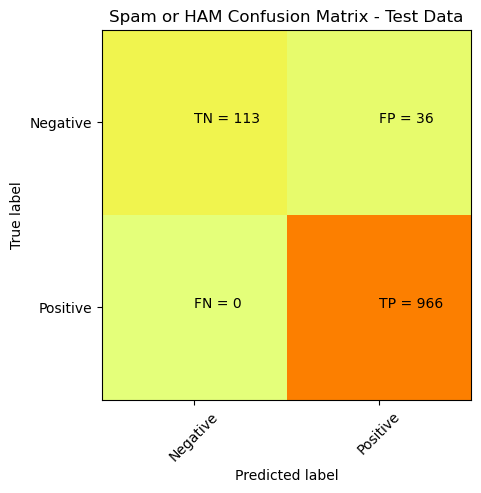

In [39]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Spam or HAM Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [41]:
# To plot and display the decision boundary that separates the two classes (Spam or HAM ):

In [32]:
print('Accuracy on Test data =',accuracy_on_test_data * 100)

Accuracy on Test data = 96.7713004484305


# we evaluate both on training & test data to check for over-fitting
- when accuaracy score is high in training data & low in test data - it is overfitting
- for eg - accuracy is 96 % in training data & 60 % in test data

# Build a predicitve system 
- Check for a new mail - wheather it is a spam or ham

In [35]:
# lets take a spam mail and check if our model - correctly predicts it 

input_mail = ['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']

# transform text mail - to numerical feature vector

input_data_features = feature_extraction.transform(input_mail)

# make predictions 

prediction = model.predict(input_data_features)

print(prediction)


if prediction[0] == 1: # first element of list 
    print("HAM Mail")
else:
    print("SPAM Mail")

[0]
SPAM Mail
